In [ ]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_bar
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_abline, geom_hline, labs, theme_light

# Data Cleaning

In [ ]:
hitters = pd.read_csv("Hitters.csv")

In [ ]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [ ]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
# Filter the dataset to include only rows where 'Salary' is null
missing_salary = hitters[hitters['Salary'].isna()]

# Display the resulting DataFrame
missing_salary.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,0.0
mean,279.677966,70.694915,6.983051,33.813559,32.610169,28.169492,8.033898,2609.186441,697.000000,70.610169,347.983051,328.779661,260.118644,281.033898,54.101695,5.576271,NaN
std,139.477898,39.994075,7.449813,20.921425,21.616578,17.935856,5.483411,2505.342123,687.099501,103.269820,349.489948,377.051724,282.404826,286.401753,71.432315,4.441976,NaN
min,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,28.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,197.500000,45.500000,1.500000,20.000000,18.500000,16.000000,4.000000,704.500000,171.000000,9.500000,71.500000,61.000000,54.000000,103.000000,4.000000,2.000000,NaN
50%,249.000000,61.000000,5.000000,30.000000,29.000000,25.000000,7.000000,1407.000000,361.000000,28.000000,167.000000,185.000000,150.000000,205.000000,23.000000,5.000000,NaN
75%,352.500000,94.000000,9.000000,44.500000,42.500000,37.500000,12.000000,4333.500000,1060.000000,66.500000,608.000000,447.000000,426.500000,342.500000,84.000000,8.000000,NaN
max,580.000000,194.000000,35.000000,91.000000,94.000000,87.000000,23.000000,9778.000000,2732.000000,442.000000,1272.000000,1652.000000,1153.000000,1378.000000,327.000000,20.000000,NaN


In [ ]:
# Filter the dataset to include only rows where 'Salary' is null
including_salary = hitters[hitters['Salary'].notna()]

# Display the resulting DataFrame
including_salary.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


When comparing the portion of the dataset with "Salary" data to the portion of the dataset with missing "Salary" data, those without salary data have a slightly higher average of the number of years in the MLB(8.03 vs 7.31). Additionally, those without salary data have a much lower number of assists(54.1 vs. 118.76). Those with missing "Salary" data also have lower average number of 1986 season at-bats, hits, home-runs, RBIs and walks, indicating they have had less playing time overall that season. Therefore, one hypothesis would be that this seems to be a group of more experienced players on the tail-end of their careers. If our analysis is more focused on active players within the beginning to the height of their careers, then it would be safe to drop these values.

In [ ]:
hitters = hitters.dropna()

hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

# Part I: Different Model Specs

## A. Regression without regularization

Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.

Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]



ct = ColumnTransformer(
  [
    ("dummify", enc, make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "drop"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

In [ ]:
# Fit the pipeline and assign it to a variable
lr_fitted = lr_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted


standardize__CRuns      480.747135
standardize__CAtBat     391.038655
standardize__Hits       337.830479
standardize__AtBat      291.094556
standardize__CRBI       260.689886
standardize__CWalks     213.892259
standardize__Walks      135.073897
standardize__CHits       86.687617
standardize__PutOuts     78.761296
standardize__Runs        60.572479
dummify__Division_W      58.424623
dummify__Division_E      58.424623
standardize__Assists     53.732490
standardize__HmRun       37.853837
dummify__League_A        31.299712
dummify__League_N        31.299712
standardize__RBI         26.994984
standardize__Errors      22.160862
standardize__Years       16.693359
standardize__CHmRun      14.181723
dummify__NewLeague_A     12.381163
dummify__NewLeague_N     12.381163
dtype: float64

The most impactful variables according to their coefficients are the career runs and at bats, as well as the individual seasons hits and at bats. These make sense as top predictor variables, as players that score lots of runs will be played more, making them more valuable and leading to more at bats. The hits in a particular season are also important as an indicator of whether the player has already hit their peak or is still performing well in the current season.

In [ ]:
scores = abs(cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_1 = np.mean(scores)
mse_model_1


121136.31031816891

## B. Ridge regression

Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the
 hyperparameter.

Fit the pipeline with your chosen
 to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.



In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", enc, make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
).set_output(transform="pandas")

In [ ]:
# Define the parameter grid for alpha
alphas = {'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_alpha


1

In [ ]:
# Refit the pipeline with the optimal alpha
ridge_pipeline_1.set_params(ridge_regression__alpha=best_alpha)
ridge_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
ridge_coefs = ridge_pipeline_1.named_steps['ridge_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = ridge_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

standardize__CRuns      320.412169
standardize__Hits       296.645050
standardize__AtBat      270.686441
standardize__CAtBat     225.406548
standardize__CWalks     184.423611
standardize__CRBI       160.386784
standardize__CHits      126.659607
standardize__Walks      124.407173
standardize__PutOuts     78.623656
dummify__Division_W      60.015595
dummify__Division_E      60.015595
standardize__Assists     47.462597
standardize__CHmRun      39.070924
standardize__Years       38.667748
dummify__League_N        30.438855
dummify__League_A        30.438855
standardize__Runs        29.339406
standardize__Errors      23.724190
standardize__HmRun       18.100592
dummify__NewLeague_A     13.111282
dummify__NewLeague_N     13.111282
standardize__RBI          9.113295
dtype: float64

The most impactful variables according to their coefficients in a ridge regression are Career Runs and Season Hits. This somewhat aligns with our findings from linear regression, as players that score more runs would be more valuable to a team.

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(ridge_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_2 = np.mean(scores)
mse_model_2

119144.43267691585

## C. Lasso Regression

Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the
 hyperparameter.

Fit the pipeline with your chosen
 to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", enc, make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
).set_output(transform="pandas")

In [ ]:
# Define the parameter grid for alpha
alphas = {'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['lasso_regression__alpha']
best_alpha


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.594e+06, tolerance: 4.708e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.059e+06, tolerance: 3.606e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.591e+06, tolerance: 4.137e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

1

In [ ]:
# Refit the pipeline with the optimal alpha
lasso_pipeline_1.set_params(lasso_regression__alpha=best_alpha)
lasso_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
lasso_coefs = lasso_pipeline_1.named_steps['lasso_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = lasso_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

standardize__CRuns      3.755655e+02
standardize__Hits       3.043595e+02
standardize__AtBat      2.823710e+02
standardize__CRBI       1.926109e+02
standardize__CWalks     1.896446e+02
standardize__CAtBat     1.626398e+02
standardize__Walks      1.206953e+02
dummify__Division_E     1.144130e+02
standardize__PutOuts    7.876037e+01
standardize__Assists    4.199668e+01
dummify__League_A       3.582607e+01
standardize__Years      3.494815e+01
standardize__Runs       2.496651e+01
standardize__Errors     1.847938e+01
standardize__CHmRun     1.422599e+01
standardize__HmRun      1.112702e+01
dummify__Division_W     2.078929e-11
dummify__League_N       9.974641e-14
standardize__RBI        0.000000e+00
standardize__CHits      0.000000e+00
dummify__NewLeague_N    0.000000e+00
dummify__NewLeague_A    0.000000e+00
dtype: float64

The most important variables according to their coefficients in a Lasso regression are Career Runs and Season Hits, which is the same as Ridge regression.

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(lasso_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_3 = np.mean(scores)
mse_model_3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.815e+03, tolerance: 4.281e+03


119761.58740741308

## D. Elastic Net

Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the hyperparameters.

Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", enc, make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
).set_output(transform="pandas")

In [ ]:
tune = {'elastic_regression__alpha' : [0.01, 0.1, 1, 10, 100],
        'elastic_regression__l1_ratio' : [0.25, 0.5, 0.75, 1]}
gscv = GridSearchCV(elastic_pipeline_1, tune, cv = 5, scoring = 'neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

results_df = pd.DataFrame(gscv_fitted.cv_results_)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score", "rank_test_score"]]
results_df.sort_values("rank_test_score", ascending = True).head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+05, tolerance: 4.708e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.359e+04, tolerance: 3.606e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e+05, tolerance: 4.137e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score,rank_test_score
0,0.01,0.25,-119009.799554,1
6,0.1,0.75,-119036.413543,2
1,0.01,0.5,-119123.793086,3
5,0.1,0.5,-119381.375571,4
2,0.01,0.75,-119404.656010,5


In [ ]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha = 0.01, l1_ratio = 0.25))]
)
elastic_fitted = elastic_pipeline_1.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

feature_names = elastic_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__Hits       266.646982
standardize__CRuns      254.831964
standardize__AtBat      247.711321
standardize__CWalks     166.334256
standardize__CAtBat     151.985272
standardize__CRBI       132.427745
standardize__CHits      125.875104
standardize__Walks      116.406884
standardize__PutOuts     78.247792
dummify__Division_E      60.615378
dummify__Division_W      60.615155
standardize__CHmRun      51.992563
standardize__Years       46.783570
standardize__Assists     43.505198
dummify__League_N        29.552910
dummify__League_A        29.552544
standardize__Errors      24.435548
standardize__Runs        14.006020
dummify__NewLeague_N     12.736040
dummify__NewLeague_A     12.735830
standardize__HmRun        9.271400
standardize__RBI          1.437812
dtype: float64

The most important variables according to the coefficients in a ElasticNet regression are season Hits and Career Runs. This somewhat aligns with our findings from the other pipelines, with Season Hits moving up from second to first.

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(elastic_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_4 = np.mean(scores)
mse_model_4

119009.79955442323

# Part II. Variable Selection

Based on the above results, decide on:

Which numeric variable is most important.

Which five numeric variables are most important

Which categorical variable is most important

For each of the four model specifications, compare the following possible feature sets:

Using only the one best numeric variable.

Using only the five best variables.

Using the five best numeric variables and their interactions with the one best categorical variable.

Report which combination of features and model performed best, based on the validation metric of MSE.

(Note:
 and
 must be re-tuned for each feature set.)

In [ ]:
ridge_df = pd.DataFrame(ridge_coeff_series).reset_index()
ridge_df = ridge_df.rename({"index": "labels", 0: "ridge_values"}, axis = 1)
ridge_df['linear_values'] = lr_coefs
ridge_df['lasso_values'] = lasso_coefs
ridge_df['elastic_values'] = elastic_coefs
ridge_df['average_values'] = abs(ridge_df.mean(axis = 1))

<ipython-input-265-d9603c8900a4>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
ridge_df.sort_values('average_values', ascending = False)

,labels,ridge_values,linear_values,lasso_values,elastic_values,average_values
16,standardize__CRuns,320.412169,480.747135,3.755655e+02,254.831964,357.889197
7,standardize__Hits,296.645050,337.830479,3.043595e+02,266.646982,301.370505
6,standardize__AtBat,-270.686441,-291.094556,-2.823710e+02,-247.711321,272.965819
13,standardize__CAtBat,-225.406548,-391.038655,-1.626398e+02,-151.985272,232.767567
18,standardize__CWalks,-184.423611,-213.892259,-1.896446e+02,-166.334256,188.573692
17,standardize__CRBI,160.386784,260.689886,1.926109e+02,132.427745,186.528827
11,standardize__Walks,124.407173,135.073897,1.206953e+02,116.406884,124.145807
14,standardize__CHits,126.659607,86.687617,0.000000e+00,125.875104,84.805582
19,standardize__PutOuts,78.623656,78.761296,7.876037e+01,78.247792,78.598278
2,dummify__Division_E,60.015595,58.424623,1.144130e+02,60.615378,73.367137


The most important numeric variable is Career Runs.

The top 5 numeric variables are Career Runs, Season Hits, Season At Bats, Career At Bats, and Career Walks.

The most important categorical variable is Division.

### Linear Regression with Only Best Variable

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline_1.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

standardize__CRuns    253.351392
dtype: float64

In [ ]:
scores = abs(cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_5 = np.mean(scores)
mse_model_5

143812.9359162973

## Linear Regression with 5 Best Variables

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]



ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline_1.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

standardize__CRuns     456.319655
standardize__Hits      327.135303
standardize__CAtBat    234.721048
standardize__AtBat     196.706159
standardize__CWalks      4.068062
dtype: float64

In [ ]:
scores = abs(cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_6 = np.mean(scores)
mse_model_6

127649.37020397613

## Linear Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", enc, ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

lr_fitted = lr_pipeline_1.fit(X, y)

lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

feature_names = lr_fitted.named_steps['preprocessing_2'].get_feature_names_out()

lr_coeff_series = pd.Series(lr_coefs, index=feature_names)

lr_coeff_series_sorted = lr_coeff_series.abs().sort_values(ascending=False)
lr_coeff_series_sorted

interaction_1__standardize__CRuns                         5.771877e+02
interaction_2__standardize__Hits                          4.474046e+02
interaction_1__standardize__CRuns dummify__Division_W     3.801191e+02
interaction_4__standardize__CAtBat dummify__Division_W    3.691950e+02
interaction_2__standardize__Hits dummify__Division_W      3.580921e+02
interaction_3__standardize__AtBat dummify__Division_W     3.406356e+02
interaction_4__standardize__CAtBat                        3.247907e+02
interaction_3__standardize__AtBat                         3.245391e+02
interaction_5__standardize__CWalks dummify__Division_W    8.518723e+01
interaction_2__dummify__Division_W                        2.359054e+01
interaction_5__dummify__Division_W                        2.359054e+01
interaction_4__dummify__Division_W                        2.359054e+01
interaction_3__dummify__Division_W                        2.359054e+01
interaction_1__dummify__Division_W                        2.359054e+01
intera

In [ ]:
scores = abs(cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_7 = np.mean(scores)
mse_model_7

132104.08771759568

## Ridge Regression with Only Best Channel

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]



ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
).set_output(transform="pandas")

ridge_fitted = ridge_pipeline_1.fit(X, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_

feature_names = ridge_fitted.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
ridge_pipeline_1.set_params(ridge_regression__alpha=best_alpha)
ridge_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
ridge_coefs = ridge_pipeline_1.named_steps['ridge_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = ridge_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

standardize__CRuns    244.071121
dtype: float64

In [ ]:
scores = abs(cross_val_score(ridge_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_8 = np.mean(scores)
mse_model_8

143658.5173685888

## Ridge Regression with 5 Best Variables

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]



ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
).set_output(transform="pandas")

ridge_fitted = ridge_pipeline_1.fit(X, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_

feature_names = ridge_fitted.named_steps['preprocessing'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
ridge_pipeline_1.set_params(ridge_regression__alpha=best_alpha)
ridge_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
ridge_coefs = ridge_pipeline_1.named_steps['ridge_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = ridge_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

standardize__CRuns     380.505983
standardize__Hits      307.149947
standardize__AtBat     173.562058
standardize__CAtBat    171.164182
standardize__CWalks      7.992500
dtype: float64

In [ ]:
scores = abs(cross_val_score(ridge_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_9 = np.mean(scores)
mse_model_9

126800.37050367217

## Ridge Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", enc, ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ridge_pipeline_1 = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("ridge_regression", Ridge())]
).set_output(transform="pandas")

ridge_fitted = ridge_pipeline_1.fit(X, y)

ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_

feature_names = ridge_fitted.named_steps['preprocessing_2'].get_feature_names_out()

ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
ridge_pipeline_1.set_params(ridge_regression__alpha=best_alpha)
ridge_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
ridge_coefs = ridge_pipeline_1.named_steps['ridge_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = ridge_pipeline_1.named_steps['preprocessing_2'].get_feature_names_out()

# Create a Series for the coefficients for better readability
ridge_coeff_series = pd.Series(ridge_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
ridge_coeff_series_sorted = ridge_coeff_series.abs().sort_values(ascending=False)
ridge_coeff_series_sorted

interaction_2__standardize__Hits                          189.861011
interaction_1__standardize__CRuns                         185.877847
interaction_5__standardize__CWalks dummify__Division_W     74.985983
interaction_3__standardize__AtBat                          47.186519
interaction_5__standardize__CWalks                         46.525020
interaction_2__standardize__Hits dummify__Division_W       35.951066
interaction_4__standardize__CAtBat                         30.391897
interaction_2__dummify__Division_W                         25.393689
interaction_1__dummify__Division_W                         25.393689
interaction_4__dummify__Division_W                         25.393689
interaction_3__dummify__Division_W                         25.393689
interaction_5__dummify__Division_W                         25.393689
interaction_1__standardize__CRuns dummify__Division_W      13.193722
interaction_3__standardize__AtBat dummify__Division_W       6.121356
interaction_4__standardize__CAtBat

In [ ]:
scores = abs(cross_val_score(ridge_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_10 = np.mean(scores)
mse_model_10

127601.78765366769

## Lasso Regression with Only Best Channel

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
).set_output(transform="pandas")

lasso_fitted = lasso_pipeline_1.fit(X, y)

lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_

feature_names = lasso_fitted.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['lasso_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
lasso_pipeline_1.set_params(lasso_regression__alpha=best_alpha)
lasso_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
lasso_coefs = lasso_pipeline_1.named_steps['lasso_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = lasso_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

standardize__CRuns    243.351392
dtype: float64

In [ ]:
best_alpha

10

In [ ]:
scores = abs(cross_val_score(lasso_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_11 = np.mean(scores)
mse_model_11

143793.4491585397

## Lasso Regression with 5 Best Variables

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]



ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
).set_output(transform="pandas")

lasso_fitted = lasso_pipeline_1.fit(X, y)

lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_

feature_names = lasso_fitted.named_steps['preprocessing'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['lasso_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
lasso_pipeline_1.set_params(lasso_regression__alpha=best_alpha)
lasso_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
lasso_coefs = lasso_pipeline_1.named_steps['lasso_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = lasso_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

# Create a Series for the coefficients for better readability
lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

standardize__CRuns     392.706162
standardize__Hits      302.974589
standardize__CAtBat    175.400706
standardize__AtBat     170.154812
standardize__CWalks      0.000000
dtype: float64

In [ ]:
best_alpha

1

In [ ]:
scores = abs(cross_val_score(lasso_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_12 = np.mean(scores)
mse_model_12

127187.74346481934

## Lasso Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", enc, ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")

lasso_pipeline_1 = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("lasso_regression", Lasso())]
).set_output(transform="pandas")

lasso_fitted = lasso_pipeline_1.fit(X, y)

lasso_coefs = lasso_fitted.named_steps['lasso_regression'].coef_

feature_names = lasso_fitted.named_steps['preprocessing_2'].get_feature_names_out()

lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

# Define the parameter grid for alpha
alphas = {'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso_pipeline_1, alphas, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha found
best_alpha = grid_search.best_params_['lasso_regression__alpha']
best_alpha

# Refit the pipeline with the optimal alpha
lasso_pipeline_1.set_params(lasso_regression__alpha=best_alpha)
lasso_pipeline_1.fit(X, y)

# Extract the coefficients from the fitted pipeline
lasso_coefs = lasso_pipeline_1.named_steps['lasso_regression'].coef_

# Get feature names from the ColumnTransformer in the fitted pipeline
feature_names = lasso_pipeline_1.named_steps['preprocessing_2'].get_feature_names_out()

# Create a Series for the coefficients for better readability
lasso_coeff_series = pd.Series(lasso_coefs, index=feature_names)

# Display the coefficients sorted by their absolute values
lasso_coeff_series_sorted = lasso_coeff_series.abs().sort_values(ascending=False)
lasso_coeff_series_sorted

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+04, tolerance: 4.708e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.283e+03, tolerance: 4.137e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.131e+03, tolerance: 4.558e+03


interaction_1__standardize__CRuns                         2.381464e+02
interaction_2__standardize__Hits                          1.281205e+02
interaction_1__dummify__Division_W                        9.230475e+01
interaction_5__standardize__CWalks dummify__Division_W    4.180488e+01
interaction_1__standardize__CRuns dummify__Division_W     1.082757e+01
interaction_2__dummify__Division_W                        4.182162e-03
interaction_5__dummify__Division_W                        6.918810e-15
interaction_4__dummify__Division_W                        6.918810e-15
interaction_3__dummify__Division_W                        6.918810e-15
interaction_3__standardize__AtBat                         0.000000e+00
interaction_3__1                                          0.000000e+00
interaction_3__standardize__AtBat dummify__Division_W     0.000000e+00
interaction_4__1                                          0.000000e+00
interaction_4__standardize__CAtBat                        0.000000e+00
intera

In [ ]:
best_alpha

10

In [ ]:
scores = abs(cross_val_score(lasso_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

mse_model_13 = np.mean(scores)
mse_model_13

126681.92323543914

## ElasticNet Regression with Only Best Channel

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns'])
  ],
  remainder = "drop"
)

elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)

tune = {'elastic_regression__alpha' : [0.01, 0.1, 1, 10, 100],
        'elastic_regression__l1_ratio' : [0.25, 0.5, 0.75, 1]}
gscv = GridSearchCV(elastic_pipeline_1, tune, cv = 5, scoring = 'neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

results_df = pd.DataFrame(gscv_fitted.cv_results_)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score", "rank_test_score"]]
results_df.sort_values("rank_test_score", ascending = True).head()

,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score,rank_test_score
5,0.1,0.5,-143655.076048,1
4,0.1,0.25,-143687.045561,2
6,0.1,0.75,-143693.049732,3
0,0.01,0.25,-143767.677667,4
1,0.01,0.5,-143781.813828,5


In [ ]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha = 0.1, l1_ratio = 0.5))]
)

elastic_fitted = elastic_pipeline_1.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

feature_names = elastic_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__CRuns    241.239421
dtype: float64

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(elastic_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_14 = np.mean(scores)
mse_model_14

143655.07604766646

## ElasticNet Regression with 5 Best Variables

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
)

elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)

tune = {'elastic_regression__alpha' : [0.01, 0.1, 1, 10, 100],
        'elastic_regression__l1_ratio' : [0.25, 0.5, 0.75, 1]}
gscv = GridSearchCV(elastic_pipeline_1, tune, cv = 5, scoring = 'neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

results_df = pd.DataFrame(gscv_fitted.cv_results_)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score", "rank_test_score"]]
results_df.sort_values("rank_test_score", ascending = True).head()

,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score,rank_test_score
0,0.01,0.25,-126666.328325,1
1,0.01,0.5,-126777.955014,2
2,0.01,0.75,-127054.757580,3
6,0.1,0.75,-127185.160062,4
11,1,1,-127187.743465,5


In [ ]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha = 0.01, l1_ratio = 0.25))]
)

elastic_fitted = elastic_pipeline_1.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

feature_names = elastic_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__CRuns     331.632783
standardize__Hits      289.655601
standardize__AtBat     154.119373
standardize__CAtBat    130.093016
standardize__CWalks     15.573756
dtype: float64

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(elastic_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_15 = np.mean(scores)
mse_model_15

126666.32832458014

## ElasticNet Regression with Best 5 Numeric Variables and Their Interaction With Top Categorical Variable

In [ ]:
enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct_dummies = ColumnTransformer(
  [
    ("dummify", enc, ['Division']),
    ("standardize", StandardScaler(), ['CRuns', 'Hits', 'AtBat', 'CAtBat','CWalks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction_1", PolynomialFeatures(interaction_only = True), ["standardize__CRuns", "dummify__Division_W"]),
    ("interaction_2", PolynomialFeatures(interaction_only = True), ["standardize__Hits", "dummify__Division_W"]),
    ("interaction_3", PolynomialFeatures(interaction_only = True), ["standardize__AtBat", "dummify__Division_W"]),
    ("interaction_4", PolynomialFeatures(interaction_only = True), ["standardize__CAtBat", "dummify__Division_W"]),
    ("interaction_5", PolynomialFeatures(interaction_only = True), ["standardize__CWalks", "dummify__Division_W"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

elastic_pipeline_1 = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("elastic_regression", ElasticNet())]
)

tune = {'elastic_regression__alpha' : [0.01, 0.1, 1, 10, 100],
        'elastic_regression__l1_ratio' : [0.25, 0.5, 0.75, 1]}
gscv = GridSearchCV(elastic_pipeline_1, tune, cv = 5, scoring = 'neg_mean_squared_error')
gscv_fitted = gscv.fit(X, y)

results_df = pd.DataFrame(gscv_fitted.cv_results_)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score", "rank_test_score"]]
results_df.sort_values("rank_test_score", ascending = True).head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+04, tolerance: 4.708e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.283e+03, tolerance: 4.137e+03
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.131e+03, tolerance: 4.558e+03


,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score,rank_test_score
15,10,1,-126681.923235,1
10,1,0.75,-127109.342184,2
4,0.1,0.25,-127289.184085,3
5,0.1,0.5,-127552.455378,4
6,0.1,0.75,-128043.371711,5


In [ ]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing_1", ct_dummies),
   ("preprocessing_2", ct_inter),
  ("elastic_regression", ElasticNet(alpha = 10, l1_ratio = 1))]
)

elastic_fitted = elastic_pipeline_1.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

feature_names = elastic_pipeline_1.named_steps['preprocessing_2'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

interaction_1__standardize__CRuns                         2.381464e+02
interaction_2__standardize__Hits                          1.281205e+02
interaction_1__dummify__Division_W                        9.230475e+01
interaction_5__standardize__CWalks dummify__Division_W    4.180488e+01
interaction_1__standardize__CRuns dummify__Division_W     1.082757e+01
interaction_2__dummify__Division_W                        4.182162e-03
interaction_5__dummify__Division_W                        6.918810e-15
interaction_4__dummify__Division_W                        6.918810e-15
interaction_3__dummify__Division_W                        6.918810e-15
interaction_3__standardize__AtBat                         0.000000e+00
interaction_3__1                                          0.000000e+00
interaction_3__standardize__AtBat dummify__Division_W     0.000000e+00
interaction_4__1                                          0.000000e+00
interaction_4__standardize__CAtBat                        0.000000e+00
intera

In [ ]:
# Estimate the MSE using cross-validation
scores = abs(cross_val_score(elastic_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the average MSE
mse_model_16 = np.mean(scores)
mse_model_16

126681.92323543914

### Best Model

In [ ]:
# Create a dictionary to store model names and their MSE
mse_values = {}

# Loop through the range of models (1 to 16 inclusive)
for i in range(1, 17):  # Adjust the range to include 16 models
    model_name = f'mse_model_{i}'
    mse_values[model_name] = locals()[model_name]

# Create a DataFrame from the dictionary
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])

# Sort the DataFrame by MSE
sorted_mse_df = mse_df.sort_values(by='MSE')

# Display the sorted DataFrame
sorted_mse_df

,Model,MSE
3,mse_model_4,119009.799554
1,mse_model_2,119144.432677
2,mse_model_3,119761.587407
0,mse_model_1,121136.310318
14,mse_model_15,126666.328325
12,mse_model_13,126681.923235
15,mse_model_16,126681.923235
8,mse_model_9,126800.370504
11,mse_model_12,127187.743465
9,mse_model_10,127601.787654


Excluding the first 4 models which included all variables on the dataset, Model 15, which was the ElasticNet with the 5 best variables, performed the best. Including the first 4 Models, Model 4 performed the best, which was the Elastic Net with all variables included.

# Part III. Discussion

## A. Ridge


Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

The coefficients from my ridge models were smaller than the coefficients from my ordinary regression models. Depending on the variables included, the order of most impactful variables shifted from mostly staying the same in models with less variables to greatly differing in the most complex models.

The fact that the coefficients are smaller makes sense because ridge regression penalizes the coefficients towards 0, making them smaller.

## B. LASSO

Compare your LASSO model in I with your three LASSO models in II. Did you get the same
 results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

The optimal hyperparameter in my first LASSO model differed from the later models with different predictor variables. This makes sense because LASSO aims to prevent overfitting, so it will penalize models with more variables more aggressively. Each of the MSEs from my LASSO models differed, which makes sense because different sets of predictor variables will better predict the dependent variable, resulting in a lower MSE.

## C. Elastic Net

Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

The MSEs for ElasticNet models always beat or tied against Ridge and LASSO models. This makes sense because ElasticNet includes both Ridge and Lasso and tunes to find the optimal mix between the two to improve MSE, meaning that it should always be able to at least match the best MSE from a LASSO or Ridge model or beat it. This is why we see Models 13 and 16 tying, because ElasticNet could not beat the LASSO model so it just tuned the Ridge model out and matched what the MSE of the LASSO model could get.

# Part IV: Final Model

Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

In [ ]:
#Best Model: Model 4

enc = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

X = hitters.drop("Salary", axis = 1)
y = hitters["Salary"]

ct = ColumnTransformer(
  [
    ("dummify", enc, make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha = 0.01, l1_ratio = 0.25))]
)
elastic_fitted = elastic_pipeline_1.fit(X, y)

elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

feature_names = elastic_pipeline_1.named_steps['preprocessing'].get_feature_names_out()

elastic_coeff_series = pd.Series(elastic_coefs, index=feature_names)

elastic_coeff_series_sorted = elastic_coeff_series.abs().sort_values(ascending=False)
elastic_coeff_series_sorted

standardize__Hits       266.646982
standardize__CRuns      254.831964
standardize__AtBat      247.711321
standardize__CWalks     166.334256
standardize__CAtBat     151.985272
standardize__CRBI       132.427745
standardize__CHits      125.875104
standardize__Walks      116.406884
standardize__PutOuts     78.247792
dummify__Division_E      60.615378
dummify__Division_W      60.615155
standardize__CHmRun      51.992563
standardize__Years       46.783570
standardize__Assists     43.505198
dummify__League_N        29.552910
dummify__League_A        29.552544
standardize__Errors      24.435548
standardize__Runs        14.006020
dummify__NewLeague_N     12.736040
dummify__NewLeague_A     12.735830
standardize__HmRun        9.271400
standardize__RBI          1.437812
dtype: float64

In [ ]:
y_preds = elastic_fitted.predict(X)

hitters['y_preds'] = y_preds
hitters['residuals'] = hitters['Salary'] - hitters['y_preds']

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,y_preds,residuals
1,315,81,7,24,38,39,14,3449,835,69,...,375,N,W,632,43,10,475.0,N,388.119853,86.880147
2,479,130,18,66,72,76,3,1624,457,63,...,263,A,W,880,82,14,480.0,A,706.947663,-226.947663
3,496,141,20,65,78,37,11,5628,1575,225,...,354,N,E,200,11,3,500.0,N,1138.385636,-638.385636
4,321,87,10,39,42,30,2,396,101,12,...,33,N,E,805,40,4,91.5,N,547.050836,-455.550836
5,594,169,4,74,51,35,11,4408,1133,19,...,194,A,W,282,421,25,750.0,A,525.267435,224.732565


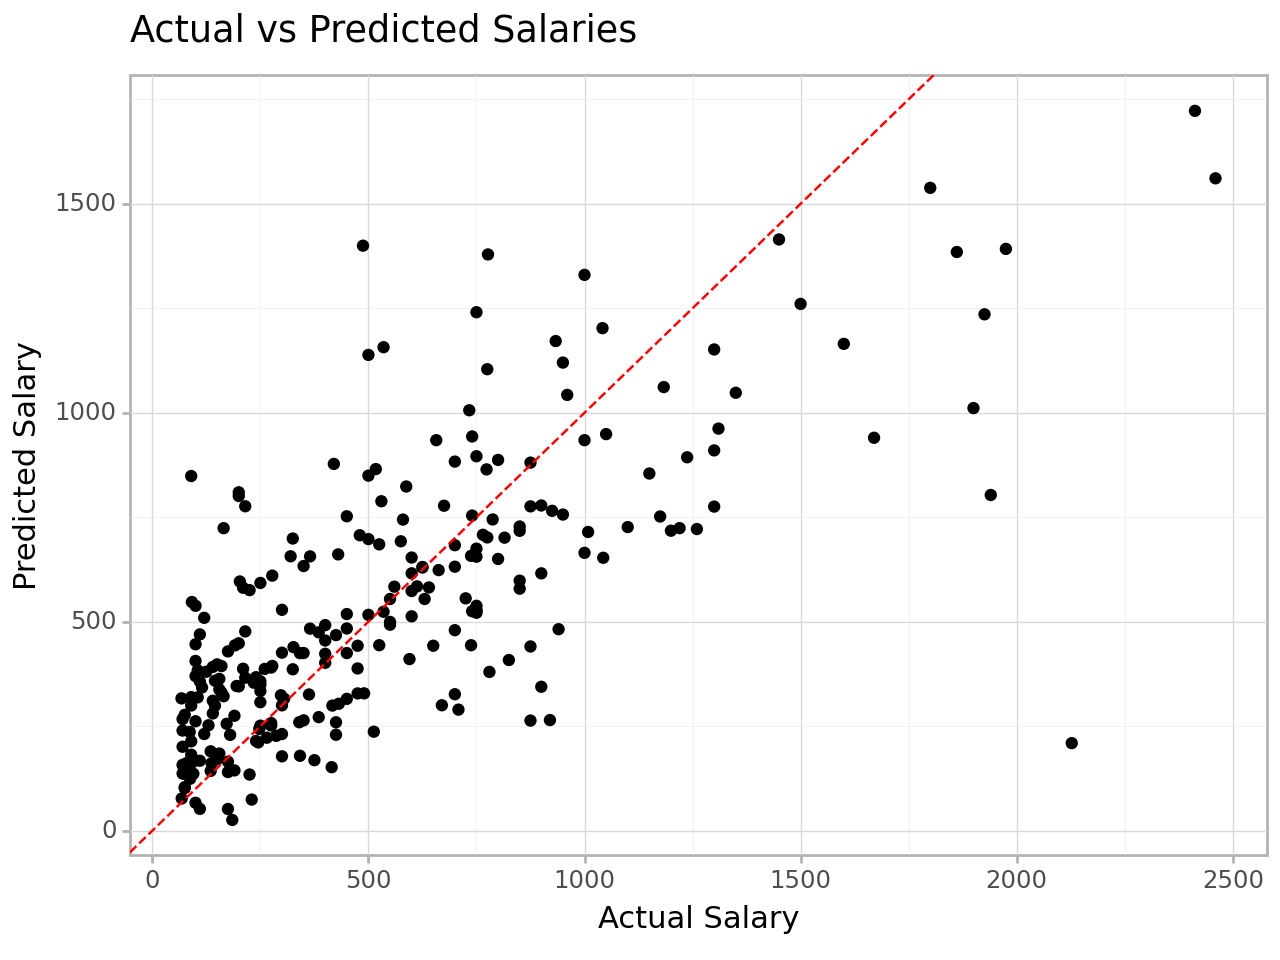

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(hitters,
    aes(
        x = "Salary",
        y = "y_preds"
        ))
+ geom_point()
+ geom_abline(intercept=0, slope=1, color='red', linetype='dashed')
+ labs(title='Actual vs Predicted Salaries', x='Actual Salary', y='Predicted Salary')
+ theme_light()
 )

Model 4 does an overall good job at predicting the Salary of baseball players in the 1989 season. This is evidenced by the scatterplot above which shows the actual vs predicted salaries. If the model were perfect, all of the values would be along the red line. Since this is not the case, the model is not perfect, but still captures the overall positive correlation that we would hope to see from our predictions and the actual values.

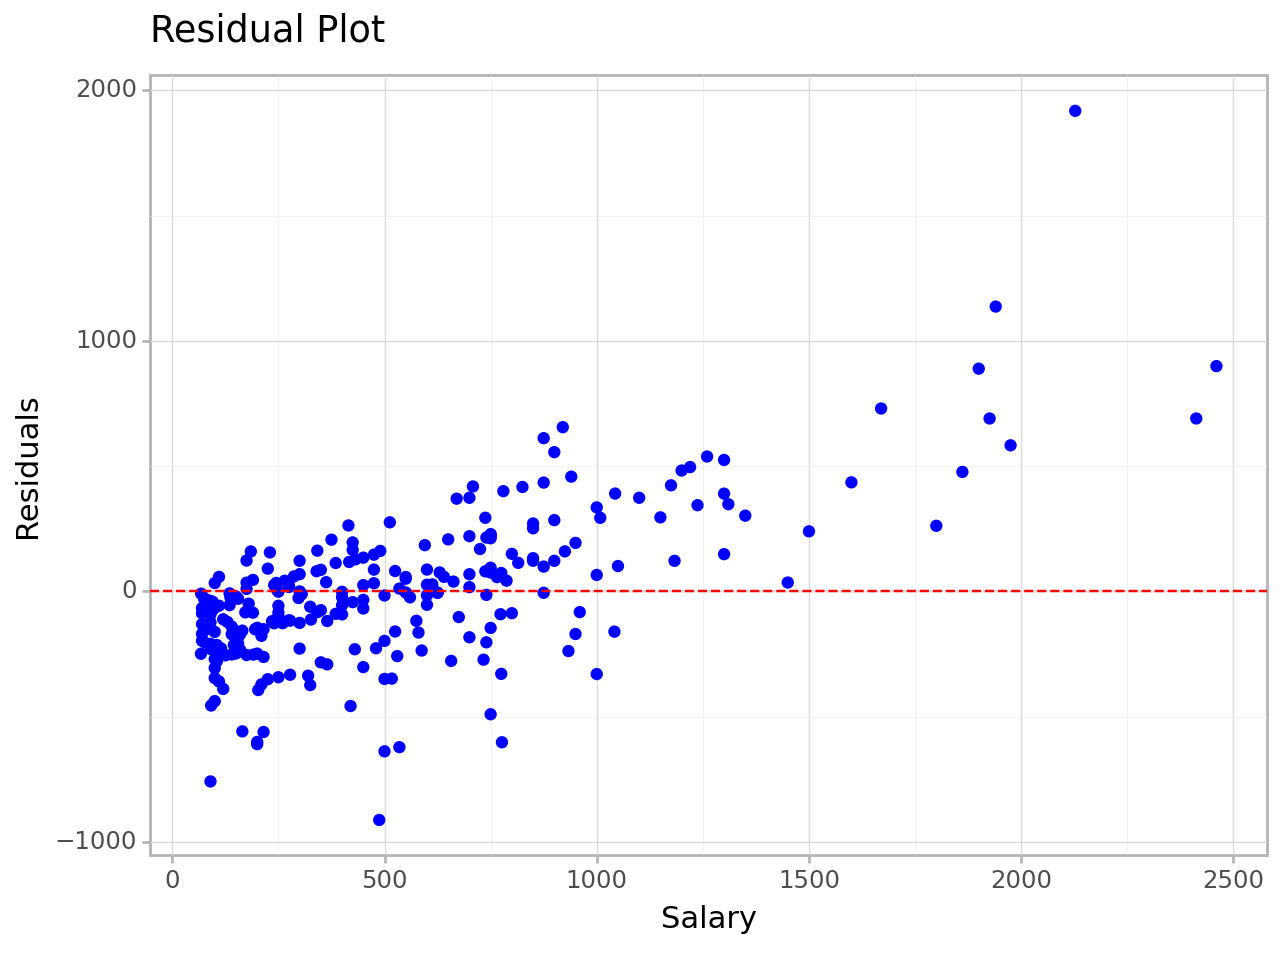

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(hitters,
    aes(
        x='Salary',
        y='residuals'))
+ geom_point(color='blue')
+ geom_hline(yintercept=0, color='red', linetype='dashed')
+ labs(title='Residual Plot', x='Salary', y='Residuals')
+ theme_light()
)

Additionally, when analyzing the residuals we see that unfortunately they are not consistently grouped around 0 for the entire x-axis. Instead, it appears that the residuals become greater as Salary increases, showing that the model is less accurate for higher salaries. This could be because we don't have as much data on that group, or because of our dropping of missing values at the start.

# Citations

Assisted by ChatGPT for:

- Sorting coefficients and indexing by feature_names
- grid_search.best_params_
- sorted df for mse
- geom_abline and geom_hline


- https://ggplot2.tidyverse.org/reference/geom_abline.html

